In [ ]:
# http://ailaby.com/logistic_reg/
# python sklearn でロジスティック回帰。fit して predict、引数 C で正則化
# のsklearnをstatsmodelsに置き換える
# FIXME: train_test_splitとStandardScalerは本筋ではないのでとりあえずそのまま...

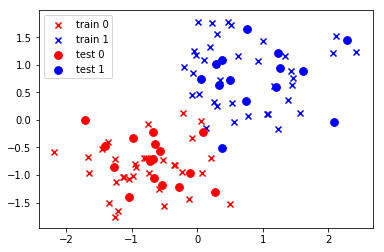

In [75]:
# ここは logistic.ipynb と同じ

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
 
# 乱数の固定化
np.random.seed(seed=0)

# (2,2)を中心に、第二引数分分散したデータを50個作る
X_0 = np.random.multivariate_normal( [2,2],  [[2,0],[0,2]],  50 )
y_0 = np.zeros(len(X_0))

# (6,7)を中心に、第二引数分分散したデータを50個作る
X_1 = np.random.multivariate_normal( [6,7],  [[3,0],[0,3]],  50 )
y_1 = np.ones(len(X_1))

# 行列を縦に連結
X = np.vstack((X_0, X_1))
y = np.append(y_0, y_1)

# 訓練データとテストデータを3:7に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 特徴データを標準化(平均 0、標準偏差 1)
# 標準化について: https://bellcurve.jp/statistics/course/7801.html
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# X[Y==0] は、ndarrayに対する、Yの条件を満たすXの要素を計算する式
# 例:
# A = np.array([1,2,3])
# a = np.array([0,0,1])
# print(A[a==0]) # => [1,2]

# X[Y==0, 0] は、上記の結果に対する行列のアクセスも含むやつ
# 例:
# B = np.array([[1, 100], [2, 200], [3, 300]])
# b = np.array([0,0,1])
# print(B[b==0,1]) # => [100, 200]

plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='red', marker='x', label='train 0')
plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='blue', marker='x', label='train 1')
plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='red', marker='o', s=60, label='test 0')
plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='blue', marker='o', s=60, label='test 1')

plt.legend(loc='upper left')

In [44]:
import statsmodels.api as sm

result = sm.Logit(endog=y_train, exog=X_train_std).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.024951
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   70
Model:                          Logit   Df Residuals:                       68
Method:                           MLE   Df Model:                            1
Date:                Mon, 08 Jan 2018   Pseudo R-squ.:                  0.9640
Time:                        10:52:25   Log-Likelihood:                -1.7465
converged:                       True   LL-Null:                       -48.492
                                        LLR p-value:                 4.082e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            18.8406     15.378      1.225      0.221     -11.301      48.982
x2            11.3791      9.253      1.230      0.219      -6.757      29.515
==============================================================================

Possibly complete quasi-separation: A fraction 0.83 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

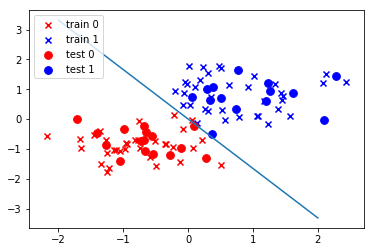

In [84]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import summary_table

x1 = result.params[0]
x2 = result.params[1]

v = np.linspace(-2, 2, 5)
plt.plot(v, (lambda x: (-x1 * x)/x2)(v))
plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='red', marker='x', label='train 0')
plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='blue', marker='x', label='train 1')
plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='red', marker='o', s=60, label='test 0')
plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='blue', marker='o', s=60, label='test 1')
plt.legend(loc='upper left')

In [83]:
## sklearnとsm.Logitの比較

# sklearn
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept = False, C = 1e9) # Cは無限大に近い方がstatsmodelsの結果と一致するようになる
mdl = model.fit(X_train_std, y_train)
print(model.intercept_) # fit_interceptがfalseなら0になる
print(model.coef_)

# sm
import statsmodels.discrete.discrete_model as sm
logit = sm.Logit(y_train, X_train_std)
f = logit.fit(disp=0)
print(f.params)

# =>
# 0.0
# [[ 18.80958202  11.35340685]]
# [ 18.8405609   11.37914275]
# だいたい同じ!!

0.0
[[ 18.80958202  11.35340685]]
[ 18.8405609   11.37914275]
